## 1. EDA movimientos

### Objetivo

Ánalisis exploratorio de las variables incluidas en el dataframe de movimientos.

### Descripción General de notebook

    1. Carga de data frame de movimientos
    2. Check valores nulos
    3. Ánalsis exploratorio de las estaciones de BiciMad
    4. Ánalisis exploratorio de la evolución de la demanda por mes, día de la semana y hora
    5. Ánalisis exploratorio del tiempo de viaje de los trayectos
    6. Ánalisis exploratorio del origen y destino de los trayectos
    7. Ánalisis exploratorio del tipo de usuario
    8. Ánalisis exploratorio de los rangos de edades de los usuarios
    9. Ánalisis exploratorio de la variable de Temporada
    10. Ánalsis exploratorio de la variable AM_PM

In [1]:
%run ".../.../Codigo/1. Librerias Mongo/MongoDB_Connections.ipynb"
%run ".../.../Codigo/1. Librerias Mongo/MongoDB_Funciones_Consultas.ipynb"

import time
import pandas as pd
# pd.options.display.float_format = '{:,}'.format

## Descarga datos

In [4]:
import time
import pandas as pd

t_ini = time.time()
data_Tracks = pd.read_csv(".../.../Data/DataFrame_Final_Cierre_2017_2019.csv")
t_end = time.time()
print (t_end - t_ini)

5.053330898284912


In [5]:
data_Tracks.shape

(2912138, 21)

In [4]:
data_Tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8266481 entries, 0 to 8266480
Data columns (total 17 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   ANIO              int64 
 1   MES               int64 
 2   DIA               int64 
 3   HORA              int64 
 4   DIA_SEMANA        int64 
 5   AM_PM             object
 6   TEMPORADA         object
 7   TEMPORADA_NUM     int64 
 8   UNPLUG_TIME_date  object
 9   travel_time       int64 
 10  idunplug_station  int64 
 11  user_type         int64 
 12  ageRange          int64 
 13  zip_code          object
 14  Es_Festivo        int64 
 15  Es_FinSemana      int64 
 16  DEMANDA           int64 
dtypes: int64(13), object(4)
memory usage: 1.0+ GB


### Missing values

In [5]:
data_Tracks.isnull().sum()

ANIO                      0
MES                       0
DIA                       0
HORA                      0
DIA_SEMANA                0
AM_PM                     0
TEMPORADA                 0
TEMPORADA_NUM             0
UNPLUG_TIME_date          0
travel_time               0
idunplug_station          0
user_type                 0
ageRange                  0
zip_code            3839830
Es_Festivo                0
Es_FinSemana              0
DEMANDA                   0
dtype: int64

### EDA: Esctación

In [6]:
data_inplug_station = data_Tracks[['idunplug_station','DEMANDA']]
data_inplug_station = data_inplug_station.groupby(['idunplug_station']).sum('Demanda')
data_inplug_station = data_inplug_station.reset_index()
#pd.set_option('display.max_rows', 20)

data_inplug_station

,idunplug_station,DEMANDA
0,1,66211
1,2,29970
2,3,52961
3,4,36296
4,5,33231
...,...,...
212,216,4355
213,217,4055
214,218,6295
215,219,8432


<AxesSubplot:>

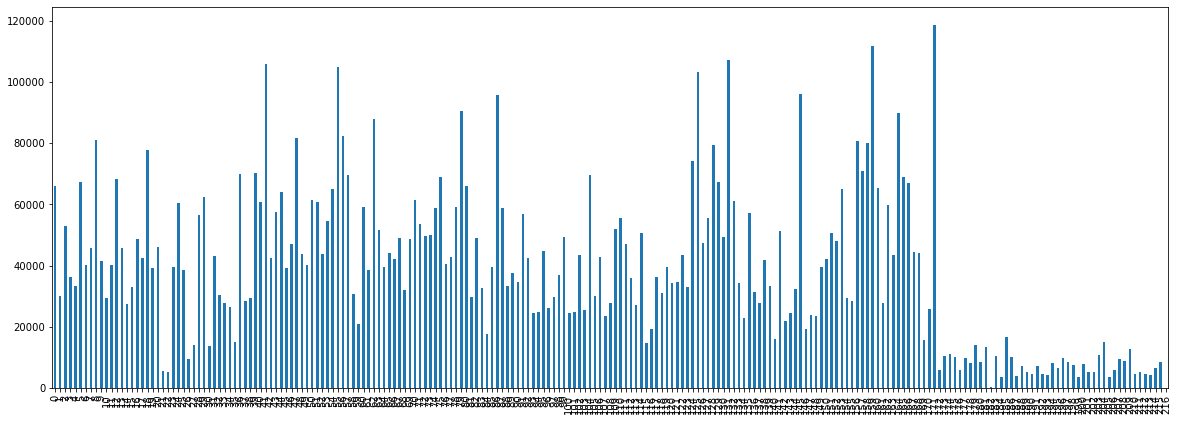

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 7))
data_inplug_station.DEMANDA.plot(kind = 'bar')

 ##### TOP 10 Estaciones con más uso

In [8]:
data_inplug_station = data_inplug_station.sort_values('DEMANDA',ascending=False)
data_inplug_station

,idunplug_station,DEMANDA
171,175,118685
159,163,111928
131,135,107200
41,43,106144
55,57,105075
...,...,...
184,188,3491
205,209,3405
199,203,3370
182,186,369


### Evolución de la demanda por mes, día de la semana y hora

In [9]:
data_mes_anio = data_Tracks[['ANIO','MES','DIA','DIA_SEMANA','DEMANDA','HORA']]
data_mes_anio = data_mes_anio.groupby(['ANIO','MES','DIA','DIA_SEMANA','HORA']).agg(DEMANDA=('DEMANDA', 'sum'))   
data_mes_anio = data_mes_anio.reset_index() 
data_mes_anio

,ANIO,MES,DIA,DIA_SEMANA,HORA,DEMANDA
0,2018,1,1,2,0,241
1,2018,1,1,2,1,175
2,2018,1,1,2,2,105
3,2018,1,1,2,3,91
4,2018,1,1,2,4,128
...,...,...,...,...,...,...
18431,2020,2,29,7,19,491
18432,2020,2,29,7,20,402
18433,2020,2,29,7,21,314
18434,2020,2,29,7,22,255


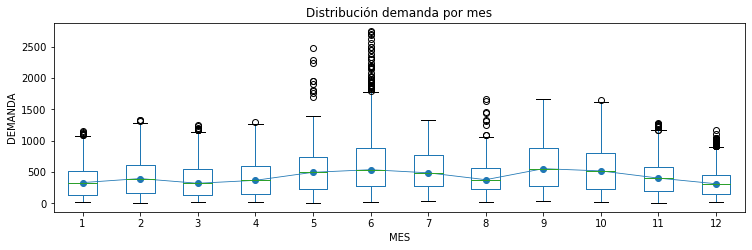

In [10]:
fig, ax = plt.subplots(figsize=(12, 3.5))
data_mes_anio.boxplot(column='DEMANDA', by='MES', ax=ax,)
data_mes_anio.groupby('MES')['DEMANDA'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('DEMANDA')
ax.set_title('Distribución demanda por mes')
fig.suptitle('');

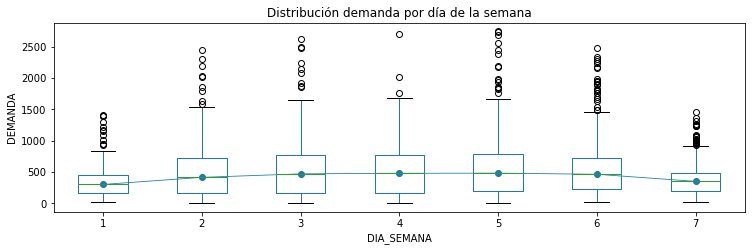

In [11]:
fig, ax = plt.subplots(figsize=(12, 3.5))
data_mes_anio.boxplot(column='DEMANDA', by='DIA_SEMANA', ax=ax,)
data_mes_anio.groupby('DIA_SEMANA')['DEMANDA'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('DEMANDA')
ax.set_title('Distribución demanda por día de la semana')
fig.suptitle('');

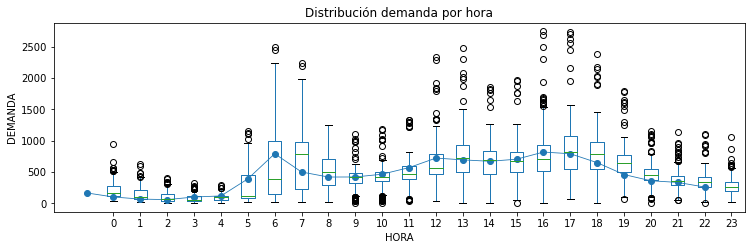

In [12]:
fig, ax = plt.subplots(figsize=(12, 3.5))
data_mes_anio.boxplot(column='DEMANDA', by='HORA', ax=ax,)
data_mes_anio.groupby('HORA')['DEMANDA'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('DEMANDA')
ax.set_title('Distribución demanda por hora')
fig.suptitle('');

### EDA: travel_time

In [13]:
data_Tracks['travel_time_mins'] = data_Tracks['travel_time']/60  # Convierte a minutos

Descripción general

In [14]:
data_Tracks['travel_time_mins'].describe()

count    8.266481e+06
mean     1.919180e+01
std      2.683027e+02
min     -1.616155e+04
25%      7.650000e+00
50%      1.151667e+01
75%      1.755000e+01
max      3.212148e+05
Name: travel_time_mins, dtype: float64

#### Histograma tiempo de viajes en BiciMAD

<AxesSubplot:>

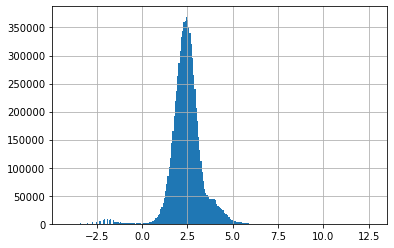

In [15]:
import numpy as np

# Convierte a logaritmo para graficar
df_nonzero_travel_times = data_Tracks.loc[data_Tracks['travel_time_mins'] > 0]

data_Tracks['travel_time_mins_log'] = np.log(df_nonzero_travel_times['travel_time_mins'])
data_Tracks['travel_time_mins_log'].hist(bins=250)


<AxesSubplot:xlabel='DIA_SEMANA', ylabel='travel_time_mins'>

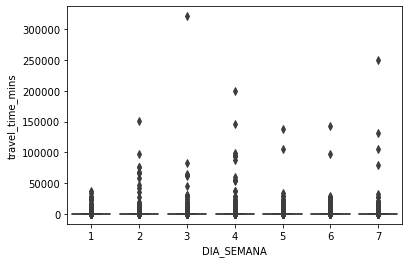

In [17]:
import seaborn as sns
df_non_extreme_travel_times = data_Tracks.loc[data_Tracks['travel_time_mins'] > 0]
sns.boxplot(x = 'DIA_SEMANA',y='travel_time_mins', data=df_non_extreme_travel_times)

### Tipos de Viaje

<AxesSubplot:xlabel='Tipo_Viaje', ylabel='Total'>

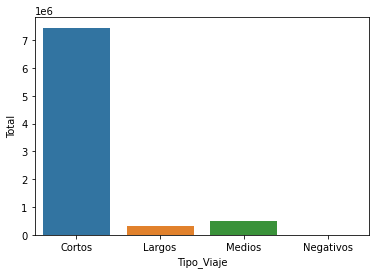

In [18]:
conditionlist = [
    (data_Tracks['travel_time_mins'] < 0) ,
    (data_Tracks['travel_time_mins'] >= 0) & (data_Tracks['travel_time_mins'] <30),
    (data_Tracks['travel_time_mins'] >= 30) & (data_Tracks['travel_time_mins'] <60),
    (data_Tracks['travel_time_mins'] >= 60)]
choicelist = ['Negativos', 'Cortos', 'Medios','Largos']
data_Tracks['Tipo_Viaje'] = np.select(conditionlist, choicelist, default='Not Specified')
data_viajes = data_Tracks.groupby(['Tipo_Viaje']).agg(Total=('Tipo_Viaje', 'count'))
data_viajes = data_viajes.reset_index() 
sns.barplot(x="Tipo_Viaje", y="Total", data=data_viajes) 

### Datos estadísticos por tipo de viaje

In [19]:
data_Tracks.groupby(['Tipo_Viaje'])['travel_time_mins'].describe()

,count,mean,std,min,25%,50%,75%,max
Tipo_Viaje,,,,,,,,
Cortos,7448368.0,11.724293,5.998995,0.00,7.266667,10.700000,15.233333,29.983333
Largos,315944.0,158.774974,1363.318474,60.00,70.700000,86.116667,114.483333,321214.816667
Medios,502097.0,42.253755,8.751052,30.00,34.383333,40.866667,49.500000,59.983333
Negativos,72.0,-800.675694,3042.855207,-16161.55,-49.762500,-43.400000,-30.291667,-3.266667


Viajes de menos de 180 segundos

In [20]:
total = data_Tracks.loc[data_Tracks['travel_time'] < 180]['user_type'].count()
print(total)

total_proc = data_Tracks.loc[data_Tracks['travel_time'] < 180]['user_type'].count() / data_Tracks['travel_time'].count() *100
print(total_proc)

215962
2.612502224344313


### EDA: origen vs destino

Estaciones en donde origen y destino son el mismo y el viaje es menor a 3 minutos

In [22]:
df_same_station = data_Tracks.loc[(data_Tracks['idunplug_station'] == data_Tracks['idunplug_station'])]
print(df_same_station['ANIO'].count())
print(df_same_station.loc[df_same_station['travel_time'] < 10]['ANIO'].count())
print(df_same_station.loc[df_same_station['travel_time'] < 60]['ANIO'].count())
print(df_same_station.loc[df_same_station['travel_time'] < 180]['ANIO'].count())

8266481
38849
95194
215962


### EDA: user_type

```
user_type = 0: Sin Registro
user_type = 1: Anual
user_type = 2: Ocasional
user_type = 3: Trabajador BiciMad
```

<AxesSubplot:xlabel='Tipo', ylabel='DEMANDA'>

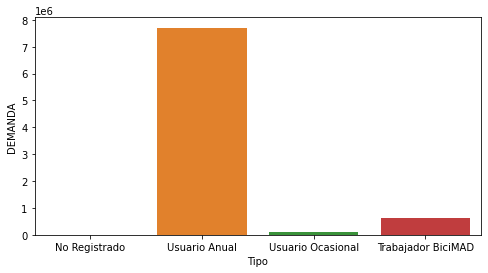

In [29]:
data_tipo_usuario = data_Tracks[['user_type','DEMANDA','travel_time_mins']]
data_tipo_usuario = data_tipo_usuario.groupby(['user_type']).agg(DEMANDA=('DEMANDA', 'sum'))   
data_tipo_usuario = data_tipo_usuario.reset_index() 
conditionlist = [
    (data_tipo_usuario['user_type'] == 0),
    (data_tipo_usuario['user_type'] == 1),
    (data_tipo_usuario['user_type'] == 2),
    (data_tipo_usuario['user_type'] == 3),
    (data_tipo_usuario['user_type'] == 6),
    (data_tipo_usuario['user_type'] == 7)
]
choicelist = ['No Registrado', 'Usuario Anual', 'Usuario Ocasional', 'Trabajador BiciMAD', 'No Registrado','No Registrado']
data_tipo_usuario['Tipo'] = np.select(conditionlist, choicelist, default='Not Specified')
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x="Tipo", y="DEMANDA", data=data_tipo_usuario) 

In [30]:
conditionlist = [
    (data_Tracks['user_type'] == 0),
    (data_Tracks['user_type'] == 1),
    (data_Tracks['user_type'] == 2),
    (data_Tracks['user_type'] == 3),
    (data_Tracks['user_type'] == 6),
    (data_Tracks['user_type'] == 7)
]
choicelist = ['No Registrado', 'Usuario Anual', 'Usuario Ocasional', 'Trabajador BiciMAD', 'No Registrado','No Registrado']
data_Tracks['Tipo'] = np.select(conditionlist, choicelist, default='Not Specified')

data_Tracks.groupby(['Tipo'])['travel_time_mins'].describe()

,count,mean,std,min,25%,50%,75%,max
Tipo,,,,,,,,
No Registrado,3938.0,36.091853,38.861095,1.400000,11.850000,21.966667,46.708333,326.583333
Trabajador BiciMAD,571094.0,71.314902,1016.287718,-43.783333,15.516667,32.916667,56.500000,321214.816667
Usuario Anual,7582219.0,14.916371,20.775927,-16161.550000,7.550000,11.100000,16.200000,360.000000
Usuario Ocasional,109230.0,42.843972,42.205474,0.783333,14.466667,27.958333,56.550000,359.100000


### EDA: age_range

```
ageRange = 0: No definido
ageRange = 1: menos 17 años
ageRange = 2: de 17 a 18 años
ageRange = 3: de 19 a 26 años
ageRange = 4: de 27 a 40 años
ageRange = 5: de 41 a 65 años
ageRange = 6: mas de 65 años
```

<AxesSubplot:xlabel='Edad', ylabel='DEMANDA'>

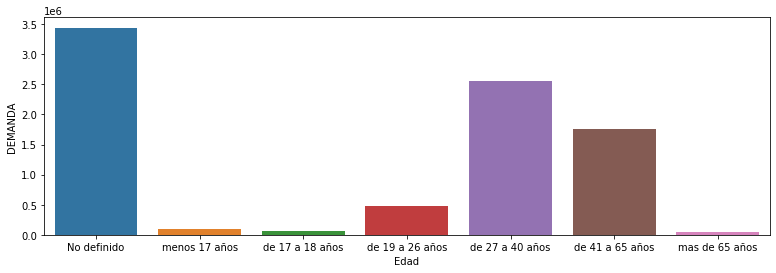

In [33]:
data_edad = data_Tracks[['ageRange','DEMANDA']]
data_edad = data_edad.groupby(['ageRange']).agg(DEMANDA=('DEMANDA', 'sum'))   
data_edad = data_edad.reset_index() 
conditionlist = [
    (data_edad['ageRange'] == 0),
    (data_edad['ageRange'] == 1),
    (data_edad['ageRange'] == 2),
    (data_edad['ageRange'] == 3),
    (data_edad['ageRange'] == 4),
    (data_edad['ageRange'] == 5),
    (data_edad['ageRange'] == 6)
]
choicelist = ['No definido', 'menos 17 años', 'de 17 a 18 años', 
              'de 19 a 26 años', 'de 27 a 40 años','de 41 a 65 años','mas de 65 años']
data_edad['Edad'] = np.select(conditionlist, choicelist, default='Not Specified')
fig, ax = plt.subplots(figsize=(13, 4))
sns.barplot(x="Edad", y="DEMANDA", data=data_edad)



In [34]:
conditionlist = [
    (data_Tracks['ageRange'] == 0),
    (data_Tracks['ageRange'] == 1),
    (data_Tracks['ageRange'] == 2),
    (data_Tracks['ageRange'] == 3),
    (data_Tracks['ageRange'] == 4),
    (data_Tracks['ageRange'] == 5),
    (data_Tracks['ageRange'] == 6)
]
choicelist = ['No definido', 'menos 17 años', 'de 17 a 18 años', 
              'de 19 a 26 años', 'de 27 a 40 años','de 41 a 65 años','mas de 65 años']
data_Tracks['Edad'] = np.select(conditionlist, choicelist, default='Not Specified')

data_Tracks.groupby(['Edad'])['travel_time_mins'].describe()

,count,mean,std,min,25%,50%,75%,max
Edad,,,,,,,,
No definido,3373318.0,20.325005,247.153426,-16161.550000,7.866667,11.916667,18.650000,250757.716667
de 17 a 18 años,63884.0,14.355503,17.561803,0.033333,6.566667,10.266667,15.916667,359.200000
de 19 a 26 años,473258.0,17.631991,496.789140,-13704.316667,7.166667,10.966667,16.533333,321214.816667
de 27 a 40 años,2503845.0,16.841557,220.427893,-55.250000,7.450000,11.016667,16.116667,151307.983333
de 41 a 65 años,1728554.0,19.705490,279.667424,-53.716667,7.766667,11.683333,17.650000,199134.033333
mas de 65 años,41061.0,18.840061,22.938935,-11.833333,7.833333,12.066667,19.400000,359.900000
menos 17 años,82561.0,46.270844,429.613713,0.000000,1.500000,21.683333,48.100000,65939.583333


### EDA: Temporada

<AxesSubplot:xlabel='TEMPORADA', ylabel='DEMANDA'>

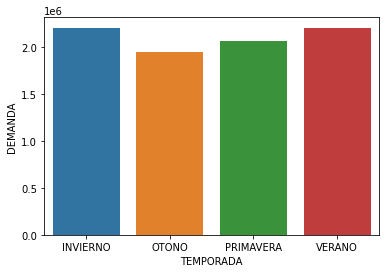

In [35]:
data_temporada = data_Tracks[['TEMPORADA','DEMANDA']]
data_temporada = data_temporada.groupby(['TEMPORADA']).agg(DEMANDA=('DEMANDA', 'sum'))   
data_temporada = data_temporada.reset_index() 
sns.barplot(x="TEMPORADA", y="DEMANDA", data=data_temporada) 

In [36]:
data_Tracks.groupby(['TEMPORADA'])['travel_time_mins'].describe()

,count,mean,std,min,25%,50%,75%,max
TEMPORADA,,,,,,,,
INVIERNO,2196703.0,19.712852,283.140524,0.000000,7.450000,11.183333,16.983333,151307.983333
OTONO,1944705.0,19.499029,289.184668,-16161.550000,7.666667,11.566667,17.566667,199134.033333
PRIMAVERA,1949451.0,18.664494,133.442768,0.000000,7.716667,11.633333,17.766667,79577.566667
VERANO,2175622.0,18.863585,319.163766,-28.616667,7.766667,11.733333,17.900000,321214.816667


### EDA: AM_PM

<AxesSubplot:xlabel='AM_PM', ylabel='DEMANDA'>

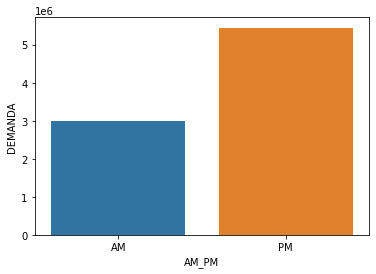

In [37]:
data_horario = data_Tracks[['AM_PM','DEMANDA']]
data_horario = data_horario.groupby(['AM_PM']).agg(DEMANDA=('DEMANDA', 'sum'))   
data_horario = data_horario.reset_index() 
sns.barplot(x="AM_PM", y="DEMANDA", data=data_horario)

In [38]:
data_Tracks.groupby(['AM_PM'])['travel_time_mins'].describe()

,count,mean,std,min,25%,50%,75%,max
AM_PM,,,,,,,,
AM,2930217.0,19.957977,382.162668,-16161.55,7.433333,11.266667,17.083333,321214.816667
PM,5336264.0,18.771088,176.967316,-12423.10,7.766667,11.666667,17.800000,145895.650000


### EDA: Stations

Stations de salida mas populares

In [39]:
data_Tracks['idunplug_station'].value_counts().sort_values(ascending=False)[:5]

175    116534
163    109714
43     105260
135    105021
57     103262
Name: idunplug_station, dtype: int64

# Serie de tiempo

In [41]:
data_serie = data_Tracks[['ANIO','MES','DIA','HORA','idunplug_station','DEMANDA']]
data_serie['FECHA'] =pd.to_datetime({'year': data_serie['ANIO'],
                                          'month': data_serie["MES"]
                                          ,'day':  data_serie['DIA']
                                         # ,'hour':data_serie['HORA']
                                          },
                                          format='%d-%m-%Y', errors='coerce')
data_serie

<ipython-input-41-cf28d4c801d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_serie['FECHA'] =pd.to_datetime({'year': data_serie['ANIO'],


,ANIO,MES,DIA,HORA,idunplug_station,DEMANDA,FECHA
0,2018,1,10,0,102,1,2018-01-10
1,2018,1,10,0,10,1,2018-01-10
2,2018,1,10,0,110,1,2018-01-10
3,2018,1,10,0,111,1,2018-01-10
4,2018,1,10,0,11,1,2018-01-10
...,...,...,...,...,...,...,...
8266476,2020,2,9,9,9,1,2020-02-09
8266477,2020,2,9,9,92,1,2020-02-09
8266478,2020,2,9,9,9,1,2020-02-09
8266479,2020,2,9,9,95,1,2020-02-09


In [42]:
data_serie_tiempo = data_serie.groupby(['FECHA']).agg(DEMANDA=('DEMANDA', 'sum'))   
data_serie_tiempo = data_serie_tiempo.reset_index()
data_serie_tiempo

,FECHA,DEMANDA
0,2018-01-01,4399
1,2018-01-02,7767
2,2018-01-03,9040
3,2018-01-04,9541
4,2018-01-05,6676
...,...,...
770,2020-02-25,13648
771,2020-02-26,14223
772,2020-02-27,14480
773,2020-02-28,13630


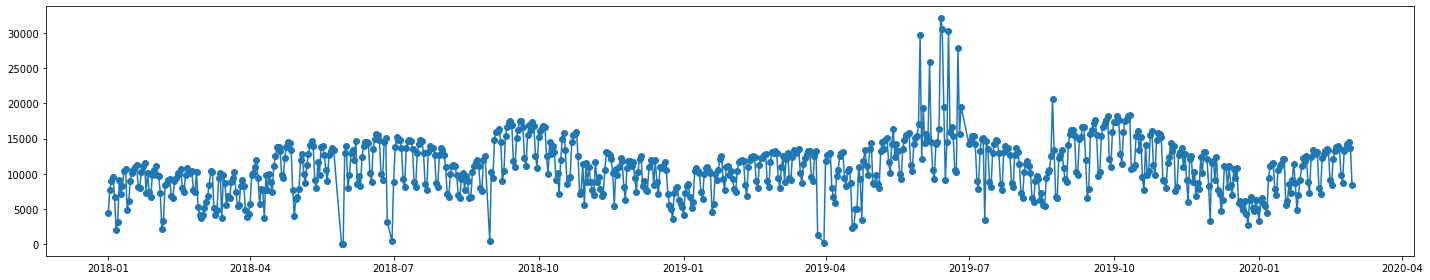

In [47]:
x = data_serie_tiempo['FECHA']
y = data_serie_tiempo['DEMANDA']
fig, ax = plt.subplots(figsize=(20, 4))
plt.plot_date(x, y,linestyle ='solid')
plt.tight_layout()
plt.show()

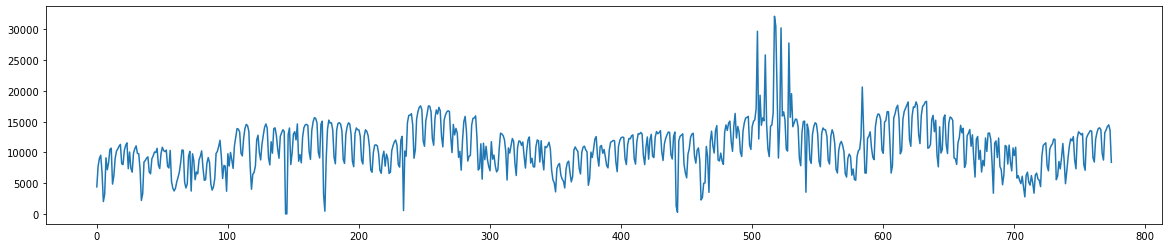

In [46]:
plot = data_serie_tiempo['DEMANDA'].plot(figsize=(20, 4))

In [49]:
import statsmodels.api as sm
ciclo, tend = sm.tsa.filters.hpfilter(data_serie_tiempo['DEMANDA'])
data_serie_tiempo['TENDENCIA'] = tend

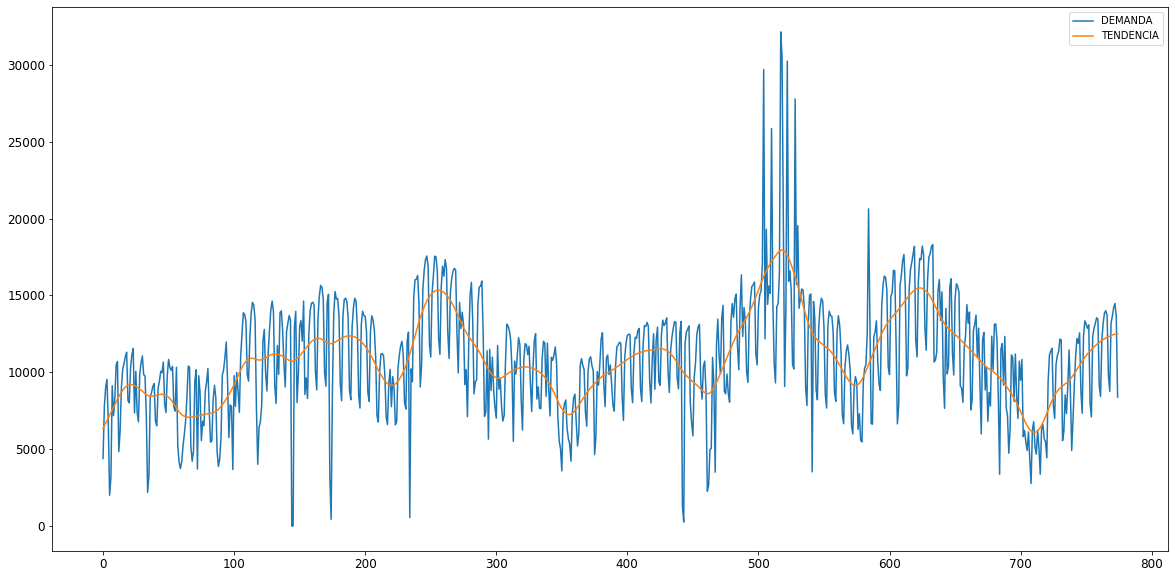

In [50]:
data_serie_tiempo[['DEMANDA','TENDENCIA']].plot(figsize=(20, 10), fontsize=12);
legend = plt.legend()
legend.prop.set_size(14);


<ipython-input-51-69f20886f623>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  descomposicion = sm.tsa.seasonal_decompose(data_serie_tiempo['TENDENCIA'],


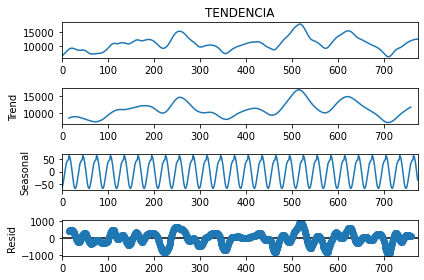

In [51]:
descomposicion = sm.tsa.seasonal_decompose(data_serie_tiempo['TENDENCIA'],
                                                  model='additive', freq=30)  
fig = descomposicion.plot()
